# Part A 
## Name : Joel Poah
## Class: DAAA/2B/06
## Admin No: 2112729

In [41]:
# pip install tensorflow
# conda install pandas
# conda install seaborn
# conda install scikit-learn
# conda install plotly
# pip install --upgrade nbformat
# conda install Jinja2

# Deep learning classifcation on Fashion MNIST 

## Overview 
### Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
| Label       | Description |
| ----------- | ----------- |
| 0           | T-shirt/Top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle Boot  |


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
data = tf.keras.datasets.fashion_mnist.load_data()
# (X_train, y_train), (X_test, y_test) = data

# split the data into train and test yet also have normal distributed classes

# split data into train , test and validation
X_train, X_test, y_train, y_test = train_test_split(data[0][0], data[0][1], test_size=0.2, random_state=42,stratify=data[0][1]) 
# 80% train, 20% test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42,stratify=y_train ) # 0.2 x 0.8 = 0.16 = 16% of original data
# we have 64% train,20% test,16% validation

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)




(40800, 28, 28) (12000, 28, 28)
(40800,) (12000,)


In [43]:
X_train_df = pd.DataFrame(X_train.reshape(-1, 784))
y_train_df = pd.DataFrame(y_train)
X_train_df


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,178,183,110,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,190,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,36,109,112,6,165,0,92,148,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40795,0,0,0,0,0,0,0,0,0,24,...,0,0,0,0,0,0,0,0,0,0
40796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40797,0,0,0,1,1,0,0,0,1,1,...,84,17,0,0,0,0,0,0,0,0
40798,0,0,0,0,0,0,0,0,0,46,...,151,0,0,0,0,0,0,0,0,0


# pixel normalization
> Dividing each of the pixels by 255 will normalize the pixels between 0 to 1 
We normalize the pixels so that it can increase the speed of the learning process
Neural Network processes inputs uses small weights values. Large inputs can disrupt or slow down learning process.
It is good that we normalize the pixels

In [44]:
print(X_train.min(), X_train.max())
# it seems like the data set provided by tensorflow is already between 0 to 255 . We can normalize it by dividing by 255 or so called pixel normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0


0 255


# when splitting stratified was used
> number of data points for each class is exactly the same. This is so that there will not be biases for each class

In [45]:
types = y_train_df[0].unique()
types.sort()
print(types)
print(y_train_df[0].value_counts())
# y_ train is just an array of numbers from 0 to 9 that represent the class of the image

[0 1 2 3 4 5 6 7 8 9]
4    4080
7    4080
1    4080
5    4080
9    4080
8    4080
0    4080
2    4080
6    4080
3    4080
Name: 0, dtype: int64


In [46]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


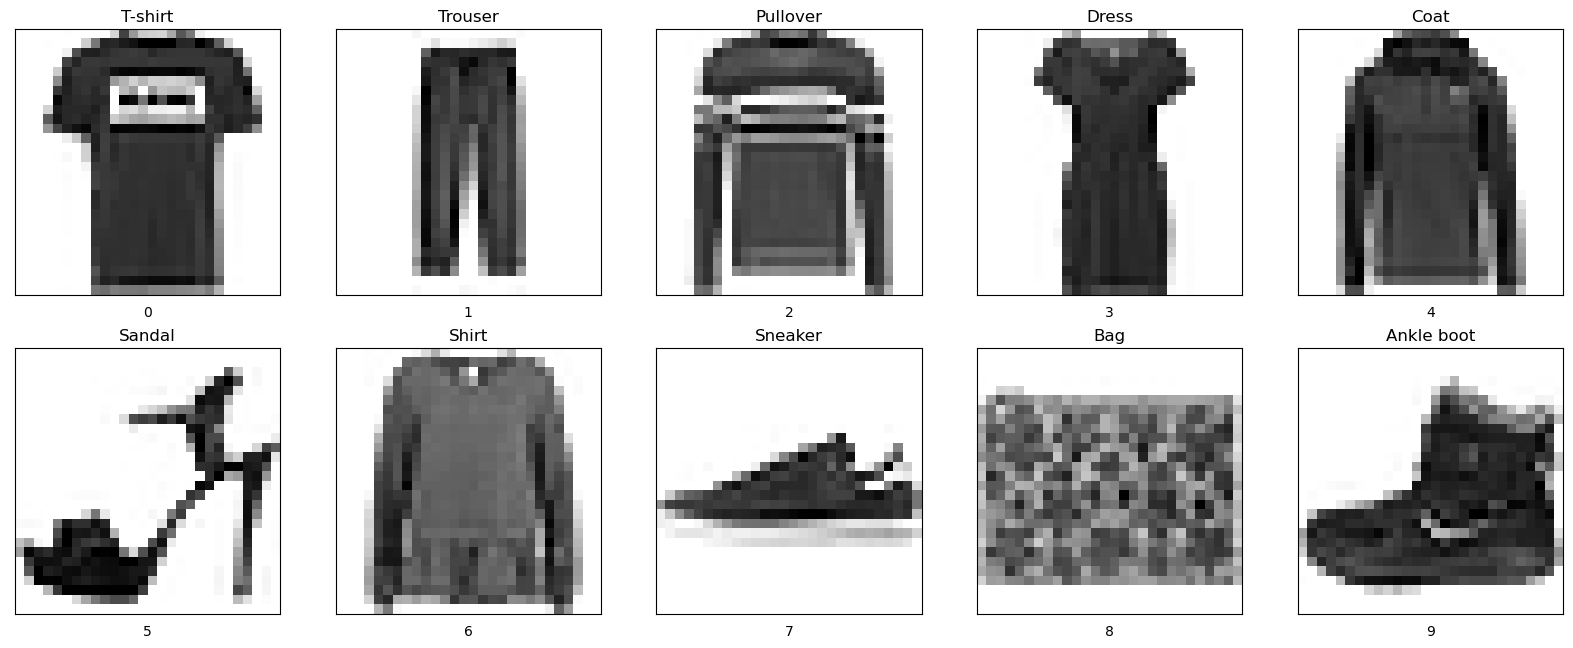

In [47]:
array_of_each_class_position = [1,21,5,20,24,9,18,6,23,0]
# plot all images in array_of_each_class_position
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[i])
    plt.imshow(data[0][0][array_of_each_class_position[i]], cmap=plt.cm.binary)
    plt.xlabel(data[0][1][array_of_each_class_position[i]])
plt.show()

- X_train: uint8 NumPy array of grayscale image data with shapes (, 28, 28), containing the training data.

- y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

- X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

- y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

# Dense Neural Network / Multi layer perceptrons (MLPs) 
## MLP is a Artificial Neural Network consisting of at least 3 layers ( input , hidden layer and output) 

![](./images/DenseNN.gif) 

## **Trying out Dense neural networks** 
### 1 Layered Densely connected neural network 
- It is 1 dimensional 
- image was 28 by 28 pixels but flattened to an array of attributes (784) 
- Neural network takes in 784 columns of attributes as inputs and pass to 128 neurons in the example shown below
- Hidden layer then passes to the sigmoid function which generates a prediction percentage for the 10 classes

#### Things i discovered while experimenting with 1 layered dense neural network
- loss='sparse_categorical_crossentropy" is used for label encoded data
- input shape of the Dense layer have to match the amount of attributes in dataset or else error thrown

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1275/1275 - 4s - loss: 0.5357 - accuracy: 0.8119 - 4s/epoch - 3ms/step
Epoch 2/5
1275/1275 - 4s - loss: 0.3993 - accuracy: 0.8555 - 4s/epoch - 3ms/step
Epoch 3/5
1275/1275 - 3s - loss: 0.3563 - accuracy: 0.8703 - 3s/epoch - 3ms/step
Epoch 4/5
1275/1275 - 4s - loss: 0.3295 - accuracy: 0.8790 - 4s/epoch - 3ms/step
Epoch 5/5
1275/1275 - 4s - loss: 0.3081 - accuracy: 0.8851 - 4s/epoch - 3ms/step
375/375 - 1s - loss: 0.3297 - accuracy:

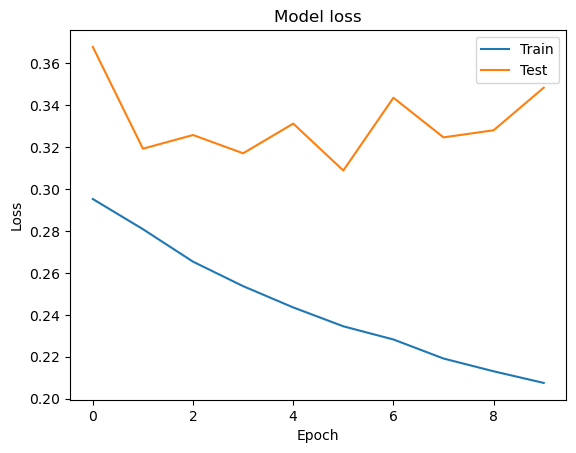

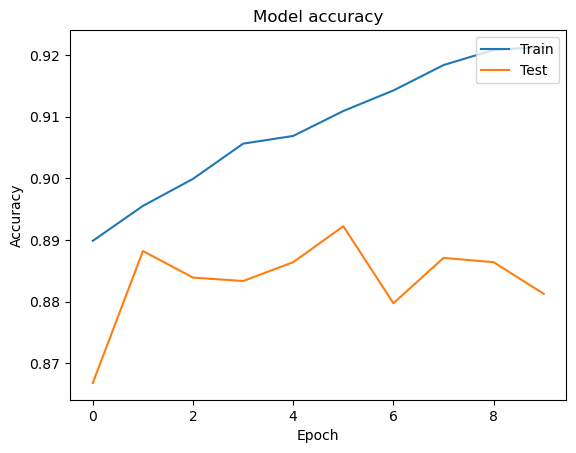

In [48]:
# Baseline simple neural network
from tensorflow.keras.layers import Flatten
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# fix random seed for reproducibility
seed = 1
np.random.seed(seed)

model = Sequential()



model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, verbose=2)
results=model.evaluate(X_test, y_test,verbose=2)
print("test loss,", results[0], "test acc:", results[1])

# Train your model and save its history
def plot_loss(loss,test_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(test_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
  
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


### 2 layer Dense Neural network
> Baseline model with at least 2 layers which performs slightly better than 1 layer
However 2 layered model is clearly overfitted where testing learning curve diverges away from training learning curve 
and only performs a little better than model with 1 layer

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1275/1275 [==============================] - 6s 5ms/step - loss: 0.5269 - accuracy: 0.8129 - val_loss: 0.4225 - val_accuracy: 0.8542
Epoch 2/5
1275/1275 [==============================] - 6s 5ms/step - loss: 0.3904 - accuracy: 0.8571 - val_loss: 0.3763 - val_accuracy: 0.8653
Epoch 3/5
1275/1275 [=====

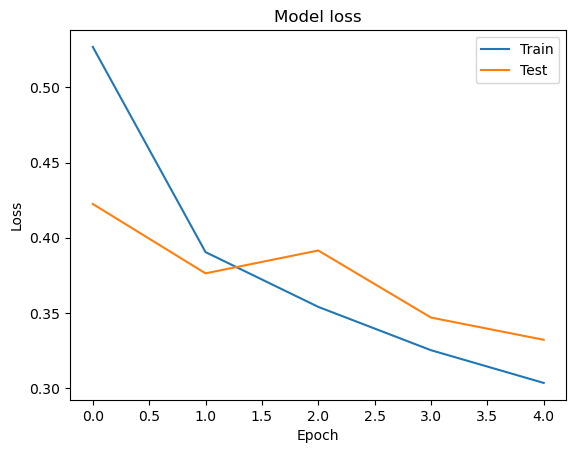

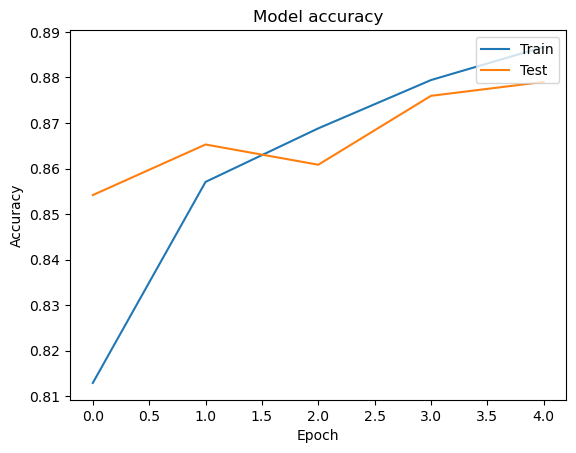

In [49]:
# Baseline simple neural network
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )


#flatten X_train and X_test


model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 5,
               validation_data=(X_val, y_val))

results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])



### 3 layered MLP 
#### Backward propagation behind the scenes of a MLP Artificial Neural Network
![](./images/Backpropagation.gif)  ![](./images/GradientDescent.gif) 
- Understood why with every epoch accuracy is increased
- BackwardPropagation adjusts weights using calculas(gradient descent) finding global minimum error of the function





Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1275/1275 [==============================] - 7s 5ms/step - loss: 0.5398 - accuracy: 0.8077 - val_loss: 0.4546 - val_accuracy: 0.8356
Epoch 2/10
1275/1275 [==============

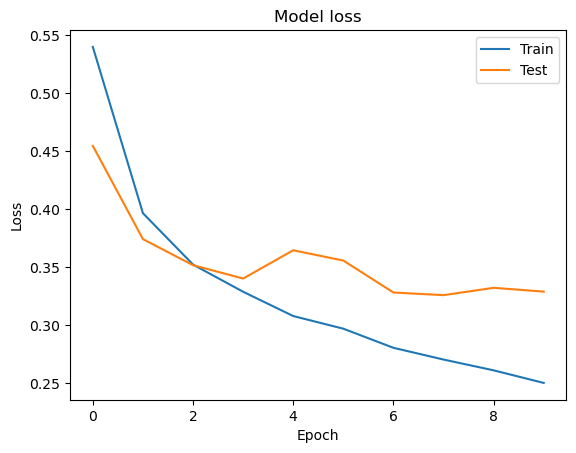

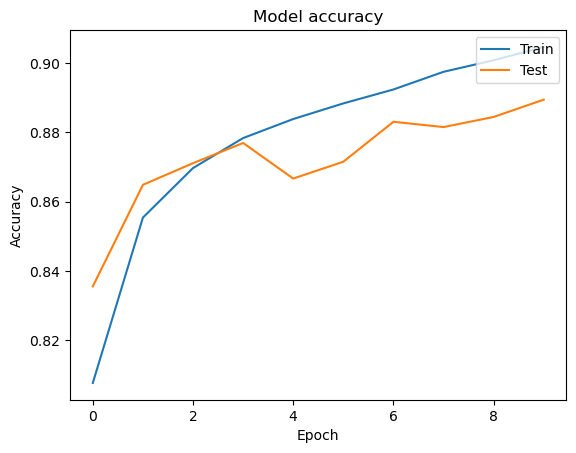

In [50]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

h_callback = model.fit(X_train, y_train,epochs = 10,
               validation_data=(X_val, y_val))

results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])



375/375 [==============================] - 1s 2ms/step


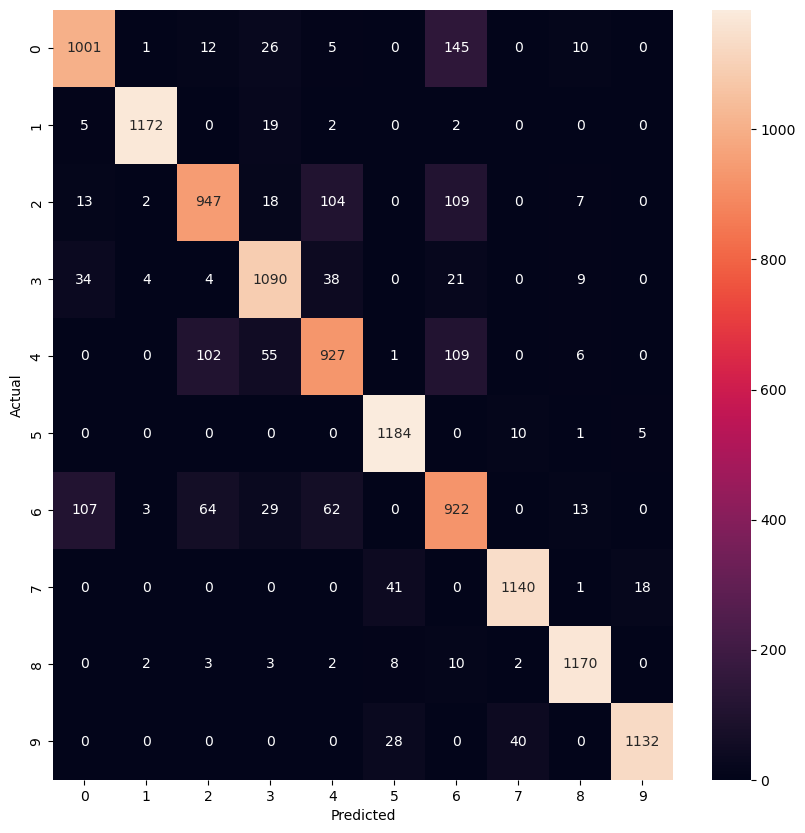

In [51]:
pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
classifation_matrix=confusion_matrix(y_test,pred)
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Conclusion
pros
- simple model
- easier to build 

cons
- can't alter input size after model is trained
- permutation invariance , everything is fully connected as they are dense layers
- Cannot perform well on those images that have the same shape

### As shown on classification matrix , this dense neural network don't perform well on classes 9(Ankle Boots) and 7(Sneaker) and 5(Sandal)

# Convolutional Neural Network (CNN)


![](./images/IntroCNN.jpeg)

## Documentation of how Convolving or Applied Filtering works in CNN
Saily Shah — Published On January 27, 2022 and Last Modified On March 15th, 2022
Shah,S *Convolutional Neural Network: An Overview* Available at: https://towardsdatascience.com/convolutional-neural-network-feature-map-and-filter-visualization-f75012a5a49c[Accessed : 4 november 2022 ]
> Convolve ~ combine (one function or series) with another by forming their convolution which is also summing the element-wise product of 2 matrices (Shah,S 2022)

![](./images/convolved_z.png)
- Dot product performed between input and filter( filter is a measure of how close a region of the input resembles a feature; it can be a vertical line,horizontal edge or diagonal)
- values found in filter(2nd matrix, *filter is also known as the kernel_size in keras*) are the weights that will be learned and tuned with backpropagation( finding global minimum error of function) in the training of the network 
- sum of the product of the matrix is 70 here
> Striding convolutions : repeating what happen above but with strides; the filter moving through the image and getting a matrix of convolved features. The main purpose of doing this is to find features of a class which will then be used for classification of the images

> ![](./images/convolve.gif)
- final matrix(convolved matrix) produced is smaller after retrieving main features of an image







## Why do we need Flattening
- Pooled feature maps are 2 Dimensional arrays 
- Usually Dense layers are used at the last part of CNNs which requires flatten or else there will be an error
- convert data into a 1 dimensional array in order to pass to the fully connected layer using Flatten
- Flatten is required unless last layer uses global pooling

## General conclusion on Convolving 
> Convolving helps neural network extract features performing better than MLP. 



In [52]:
# Functions for plotting
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

## CNN (stupid baseline)


In [53]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU
epochs = 15
num_classes = 10
seed = np.random.seed(1)

print('before',X_train.shape,X_test.shape)
print('before',y_train.shape,y_test.shape)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',X_train.shape,X_test.shape)
print('after',y_train.shape,y_test.shape)




fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)



before (40800, 784) (12000, 784)
before (40800,) (12000,)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dense_28 (Dense)            (None, 128)               4718720   
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
___________________________________________________

c:\Users\P2112729\.conda\envs\joel_gpu\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



conv2d_4 (3, 3, 1, 32)


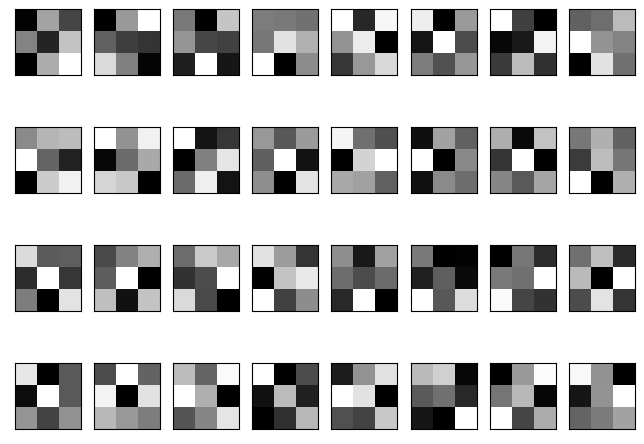

In [54]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = fashion_model.layers #Conv layers at 0, 
filters, biases = fashion_model.layers[0].get_weights()
print(layer[0].name, filters.shape)

# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer 
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

375/375 [==============================] - 1s 3ms/step


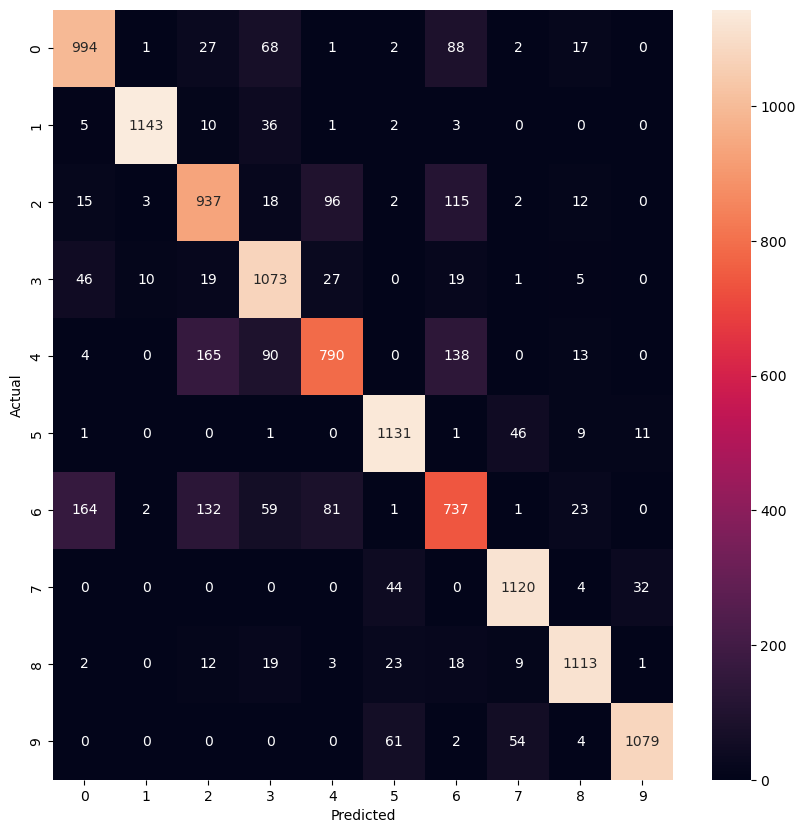

In [55]:
pred=fashion_model.predict(X_test)
pred=np.argmax(pred,axis=1)
classifation_matrix=confusion_matrix(y_test_label,pred)
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Results was a lot better as compared to the previous multilayer perceptron neural network
- There wasn't as much confusion between class 5 , 7 and 8 
### However we can still improve the model in predicting classes 2(pullover) , 4(Coat) and 6(Shirt) . Model also thinks that class 6(shirt) may be a class 0(T-shirt) occasionally it looks like the model may be confused because of the shape of the image 

### Conclusion on trying out my very first CNN 
- to_categorical is important 
>  Machines understand binary and it makes more sense to one_hot_encode to change it to an array of 0 and 1s instead of a range of 0 to 9
- even with linear activations, we can already get high accuracy scores with CNN
- Understood filters, kernel_size ,stridings and why there is a flatten layer as well
> Its amazing how the filter is extracting key information on the various classes, showing the lines edge and features of the images it is looking out for

### To carry out more test on the various parameters of CNNs I will need cross validation
- helps get better accuracy and average scores when comparing models
- Provides Median and standard deviation of models 
- using 50 epochs but with early stopping patience of 5

In [56]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping


# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		h_callback = EarlyStopping(monitor='val_loss', patience=5)
		# fit model
		history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback]) 
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
		pyplot.legend()
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
	# evaluate model
	scores, histories = evaluate_model(model,X_train, y_train)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)


## Understanding difference between loss and accuracy
![](./images/loss_accuracy.png)
### Before we continue we need to understand how we can choose the better model
#### Accuracy
- Percentage to measure classification model performance

#### Lost or Cost function
- not percentage but summation of errors made for each sample
- probabilities or uncertainty of a prediction (how much the prediction varies from true value)
> Softmax produces a probability score for all 10 classes . If the model is not too confident about the choice it makes , it will be summed up and added to logloss. The more uncertain the model is the higher the logloss

## Pooling in CNN
### Documentation of how Pooling works in CNN
![](./images/Pooling.gif)
- Reducing spatial size this helps *reduce computational power to process data* (also known as dimensionality reduction)
- Helps in retrieving dominant features
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area
- may not perform as well as max pooling since it is just averaging the noise in images

> My hypothesis is that max pooling will be better for this dataset as it completely wipes out noise in a region by taking brightest

> 88.235
> 90.686
> 91.385
> 94.081
> 93.995


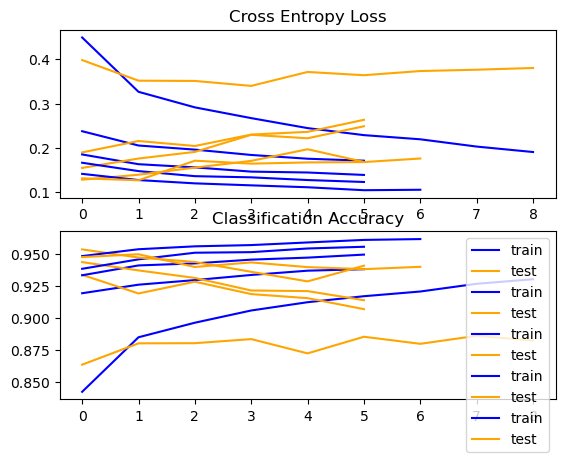

Accuracy: mean=91.676 std=2.194, n=5


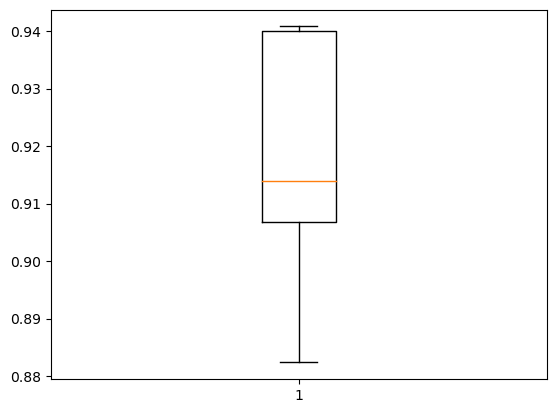

In [57]:
def model_max_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

run_test_harness(model_max_pooling(),X_train, y_train)


In [58]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
    model.add(AveragePooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

### Added batch sizing to see if it affects

In [59]:
%%time
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10, batch_size=32,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_4 (Flatten)         (None, 36864)             0         
                                                                 
 dense_32 (Dense)            (None, 128)               4718720   
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1275/1275 [=====================

c:\Users\P2112729\.conda\envs\joel_gpu\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
%%time
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10, batch_size=64,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)


In [ ]:
%%time
fashion_model_batch = Sequential()
fashion_model_batch.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1)))
fashion_model_batch.add(Conv2D(64, (3, 3), activation='linear'))
fashion_model_batch.add(Flatten())
fashion_model_batch.add(Dense(128, activation='linear'))
fashion_model_batch.add(Dense(num_classes, activation='softmax'))
fashion_model_batch.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model_batch.summary()

h_callback = fashion_model.fit(X_train, y_train, epochs = 10, batch_size=128,validation_data=(X_test, y_test))


# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)


#### Batch sizing does improve performance slightly 
>The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. Instead of having to update only after the whole dataset is trained once. It is indeed better to update after training each batch.
##### *smaller batch_size is will take more time though*

In [60]:
# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=50, batch_size=128,validation_data=(testX, testY), verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# Handling Representation Scarcity
# Data augmentation generates more data by applying the features below to the dataset
- Rotation
- Shift
- Shear
- Zoom

In [ ]:
## Importing data and augmenting it
data = tf.keras.datasets.fashion_mnist.load_data()

# split the data into train and test yet also have normal distributed classes

# split data into train , test and validation
X_train, X_test, y_train, y_test = train_test_split(data[0][0], data[0][1], test_size=0.2, random_state=42,stratify=data[0][1]) 
# 80% train, 20% test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42,stratify=y_train ) # 0.2 x 0.8 = 0.16 = 16% of original data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0
print('before',X_train.shape,X_test.shape)
print('before',y_train.shape,y_test.shape)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(X_train)

from matplotlib import pyplot as plt

gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

print('after',X_train.shape,X_test.shape)
print('after',y_train.shape,y_test.shape)

In [ ]:

model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))
#loop through the optimizers
model_2.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
    
model_2.summary()



## Trying out different activations (linear probably wasn't the best)
![](./images/activations.png) 

#### Trying out relu

> 88.125
> 90.809
> 94.583
> 96.275
> 96.176


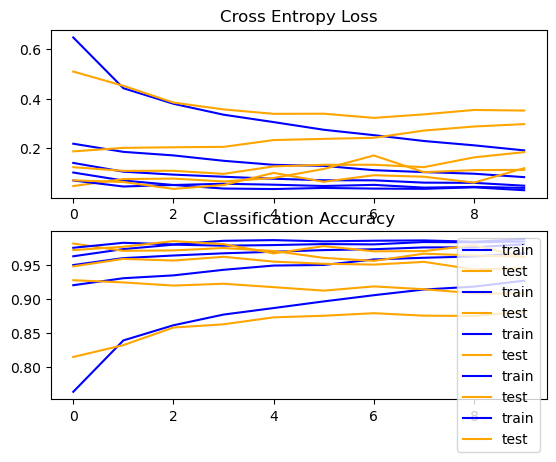

Accuracy: mean=93.194 std=3.216, n=5


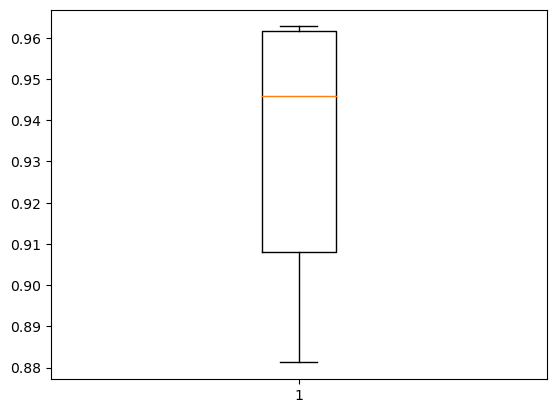

In [61]:
from tensorflow.keras.layers import Conv2D,Flatten
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import LeakyReLU

def model_relu():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return fashion_model

run_test_harness(model_relu(),X_train, y_train)





### Trying out tanh

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 128)      

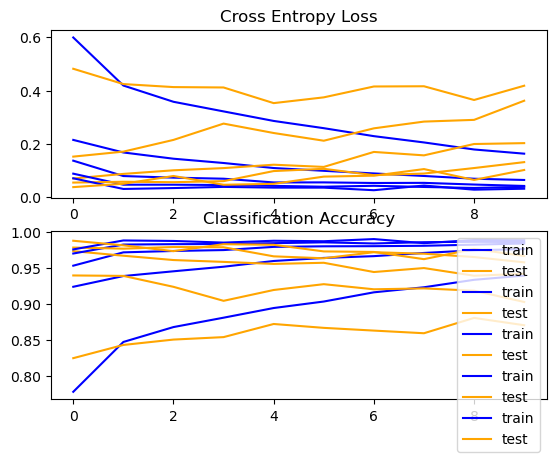

Accuracy: mean=92.838 std=3.618, n=5


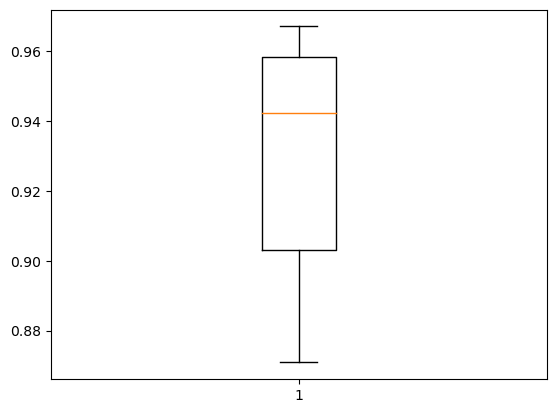

In [62]:

def model_tanh():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='tanh'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='tanh'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='linear'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_tanh(),X_train, y_train)

### Trying Out LeakyRelu

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                 

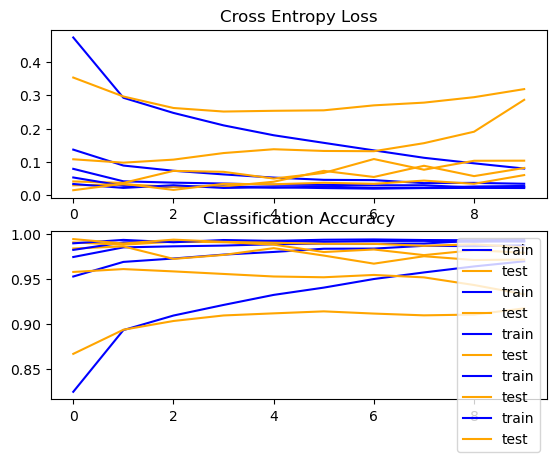

Accuracy: mean=95.725 std=2.689, n=5


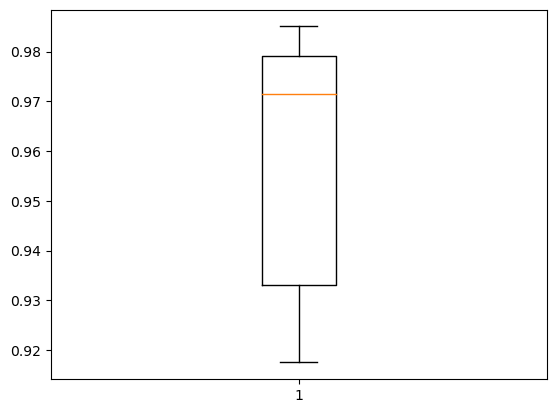

In [63]:

from keras.layers import LeakyReLU
# fix random seed for reproducibility
def model_leaky_relu():
    seed = 1
    np.random.seed(seed)
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
    fashion_model.add(LeakyReLU(alpha=0.1))
    fashion_model.add(MaxPooling2D((2, 2),padding='same'))
    fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    fashion_model.add(LeakyReLU(alpha=0.1))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    fashion_model.add(LeakyReLU(alpha=0.1))                  
    fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='linear'))
    fashion_model.add(LeakyReLU(alpha=0.1))                  
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_leaky_relu(),X_train, y_train)

### Selu

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 128)      

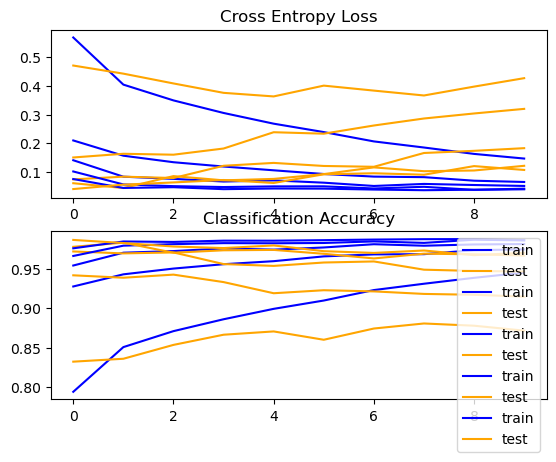

Accuracy: mean=93.404 std=3.682, n=5


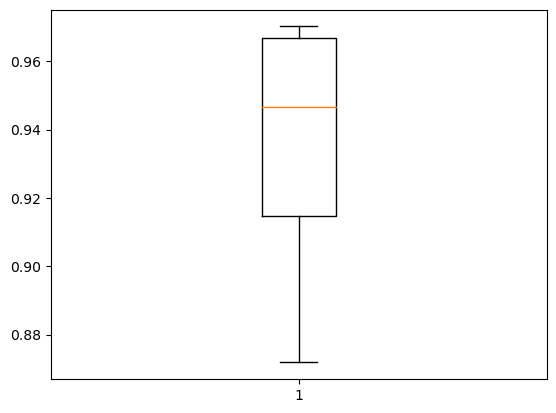

In [64]:
def model_selu():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='selu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='selu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='selu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='selu'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_selu(),X_train, y_train)


### elu

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 1, 1, 128)      

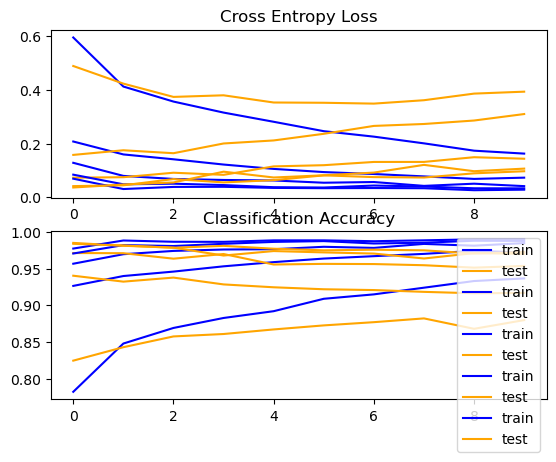

Accuracy: mean=93.897 std=3.560, n=5


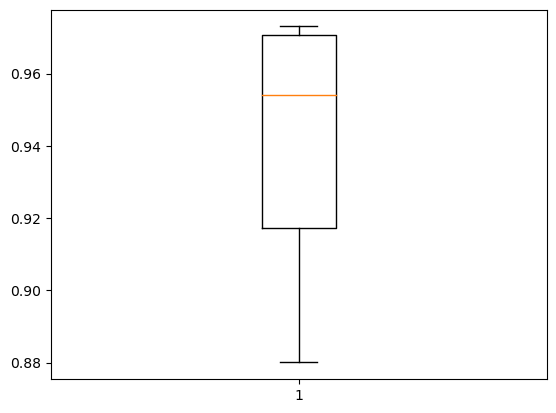

In [66]:
def model_elu():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='elu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='elu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='elu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='elu'))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_elu(),X_train, y_train)


# Adding dropout
## Explanation on dropout and why it works
<p>Dropout is randomly removing neurons in a layer but when predicting neurons is added back in. How can something random help in AI we may wonder...</p>

![](./images/dropout.png)
<p>In the picture above,if a bad node is blocked it helps the training process. However if a good node is blocked , the neural network can still learn from a separate representation of the data though not the best but its still fine </p>


> As our accuracy goes above 90 percent , we may tend to overfit and here we will try drop out to see if it can regularize and perhaps even improve validation scores

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 128)      

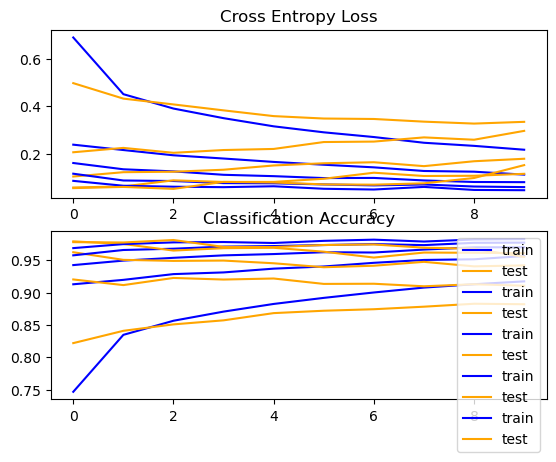

Accuracy: mean=93.017 std=2.966, n=5


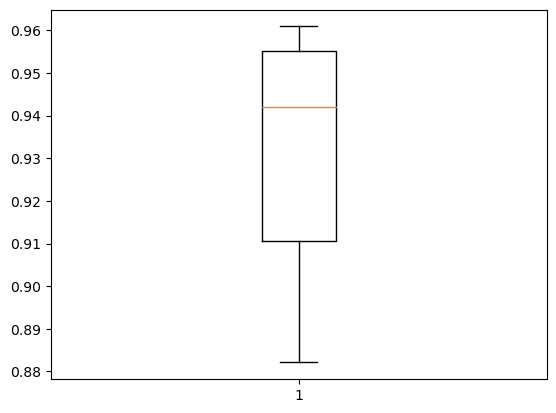

In [67]:
def model_dropout():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_dropout(),X_train, y_train)


> Adding drop out does improve performance

# Trying out different optimizers
![](./images/Optimizers.gif)

## Stochastic Gradient Descent (SGD)
> Instead of computing the gradients over the entire dataset, it performs a parameter update for each example in the dataset.The problem of SGD is that the updates are frequent and with a high variance, so the objective function heavily fluctuates during training.This fluctuation can be an advantage with respect to batch gradient descent because it allows the function to jump to better local minima, but at the same time it can represent a disadvantage with respect to the convergence in a specific local minima.

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 1, 1, 128)      

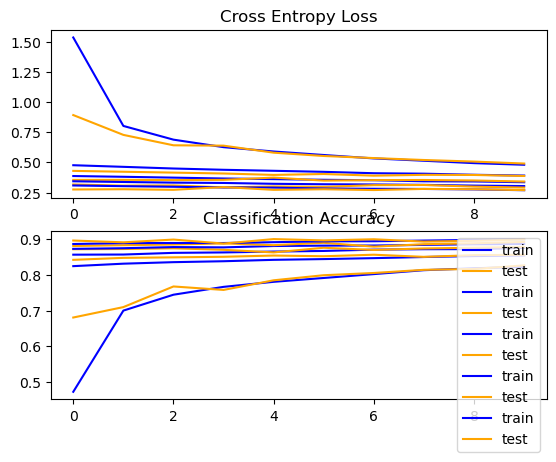

Accuracy: mean=87.034 std=2.647, n=5


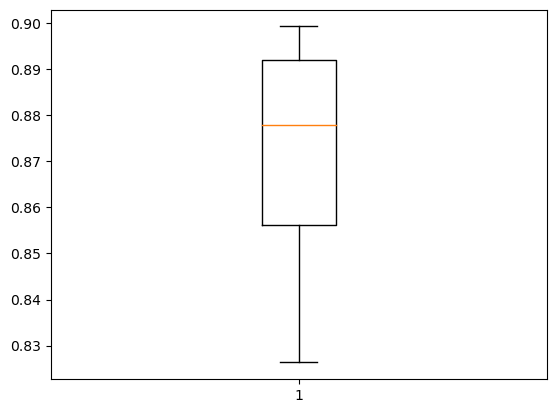

In [68]:
def model_sgd():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_sgd(),X_train, y_train)


## Adagrad
>It adapts the learning rate to the parameters performing small updates for frequently occurring features and large updates for the rarest ones.In this way, the network is able to capture information belonging to features that are not frequent, putting them in evidence and giving them the right weight.The problem of Adagrad is that it adjusts the learning rate for each parameter according to all the past gradients. So, the possibility of having a very small learning rate after a high number of steps — resulting from the accumulation of all the past gradients — is relevant.If the learning rate is too much small, we simply can’t update weights and the consequence is that the network doesn’t learn anymore.

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 1, 1, 128)      

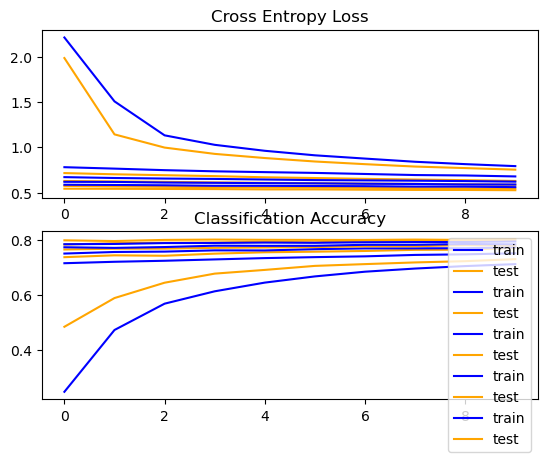

Accuracy: mean=77.743 std=2.616, n=5


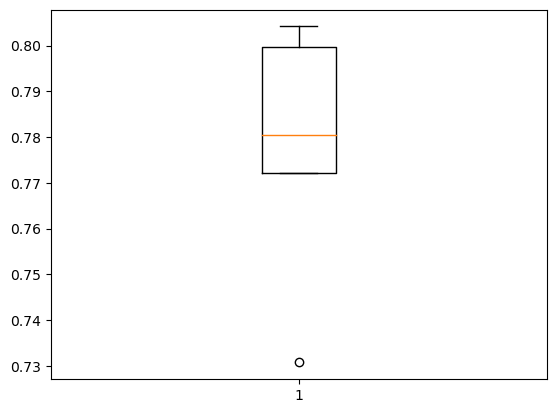

In [69]:
def model_adagrad():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_adagrad(),X_train, y_train)

## Adadelta
> It improves the previous algorithm by introducing a history window which sets a fixed number of past gradients to take in consideration during the training.In this way, we don’t have the problem of the vanishing learning rate.

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 1, 1, 128)      

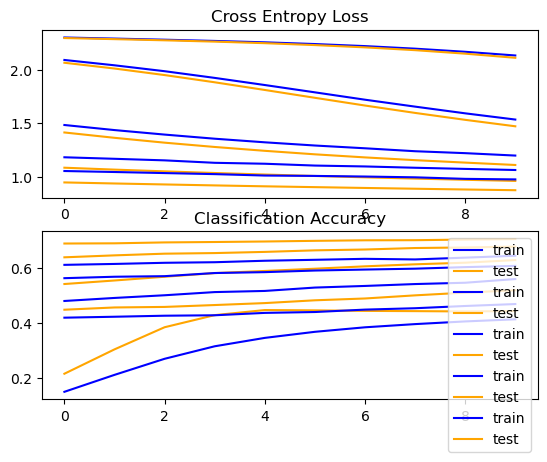

Accuracy: mean=59.561 std=9.905, n=5


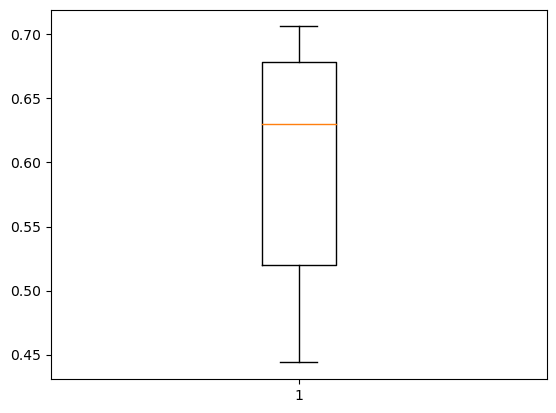

In [70]:
def model_adadelta():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model


run_test_harness(model_adadelta(),X_train, y_train)

## RMSprop
>It is very similar to Adadelta. The only difference is in the way they manage the past gradients.

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 1, 1, 128)      

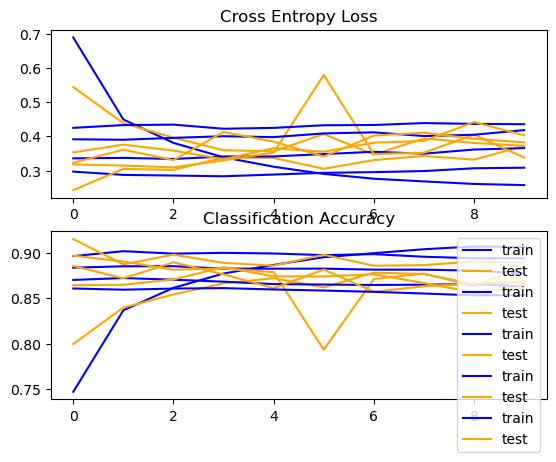

Accuracy: mean=87.480 std=1.063, n=5


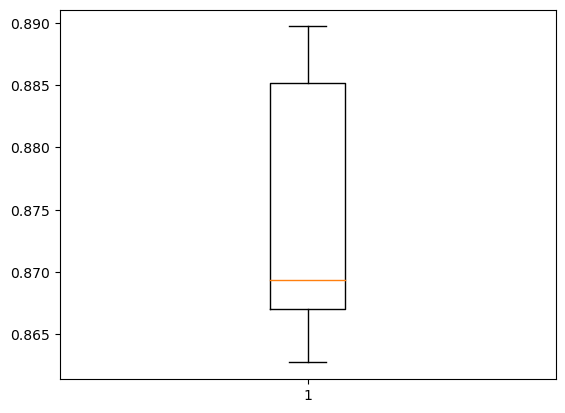

In [71]:
def model_rmsprop():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_rmsprop(),X_train, y_train)

## Adam
>It adds to the advantages of Adadelta and RMSprop, the storing of an exponentially decaying average of past gradients similar to momentum.

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 1, 1, 128)      

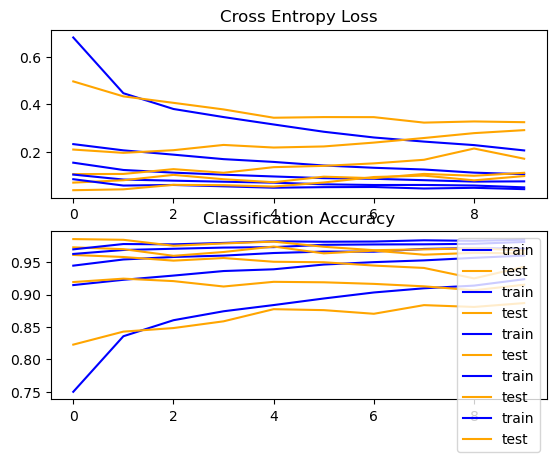

Accuracy: mean=93.522 std=3.061, n=5


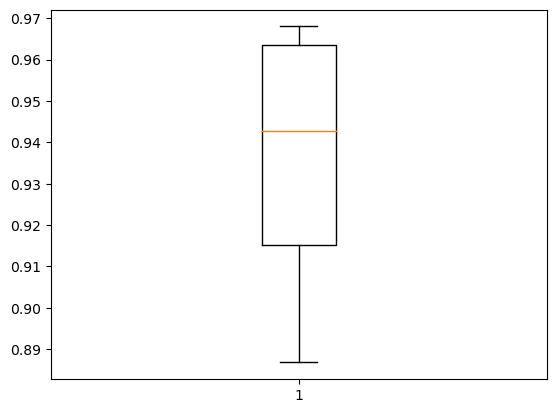

In [72]:
def model_adam():
    fashion_model = Sequential()
    fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
    fashion_model.add(MaxPooling2D((2, 2)))
    fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Conv2D(128, (3, 3), activation='relu'))
    fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu'))
    fashion_model.add(Dropout(0.2))
    fashion_model.add(Dense(num_classes, activation='softmax'))

    fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    fashion_model.summary()
    return fashion_model

run_test_harness(model_adam(),X_train, y_train)


## Conclusion 


## Some activations work better with certain optimizers lets find out
- set batch size to 128 
- epochs to 100 
- added reduce learning rate on plateau
> reduced learning rate on plateau is added and batch size is increased to hasten the compute time and also more epochs with early stopping to see performance of models.

![](./images/reducelrplateau.png)

> reducing learning rate as val_loss plateaus allows optimizer to more efficiently find minimum in loss surface

In [75]:
from keras.callbacks import ReduceLROnPlateau
### function for looping through all the models
def tune_model_act_opt(act,opt):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                    activation=act,
                    kernel_initializer='he_normal',
                    input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation=act))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation=act))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation=act))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))  
    # compile model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt,metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    summarize_diagnostics(history,act,opt)
    return (acc*100)
    

> 92.375


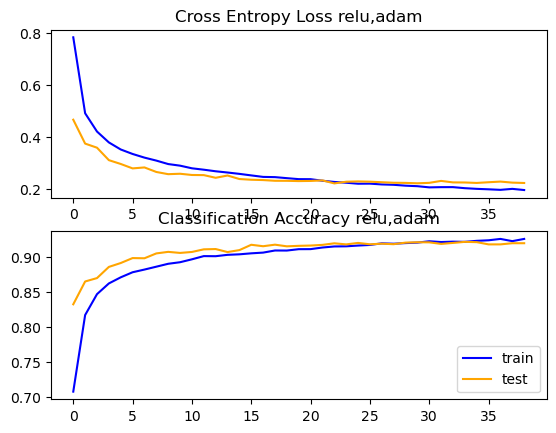

> 87.975


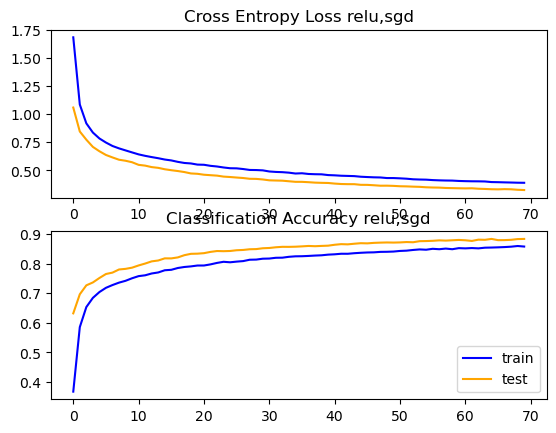

> 90.833


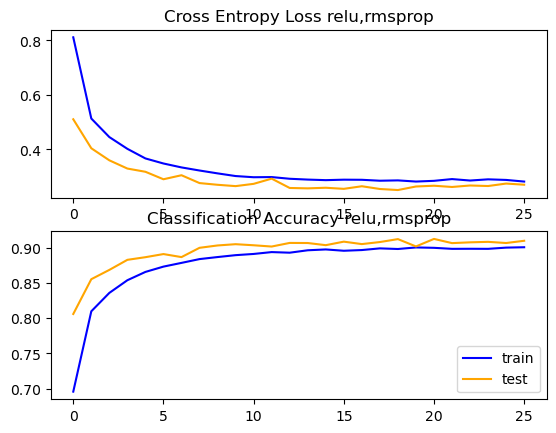

> 83.067


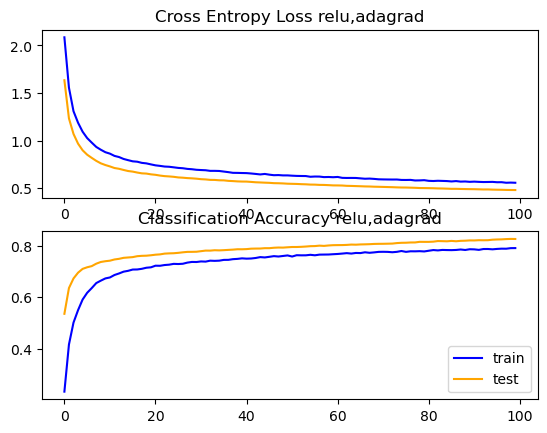

> 73.200


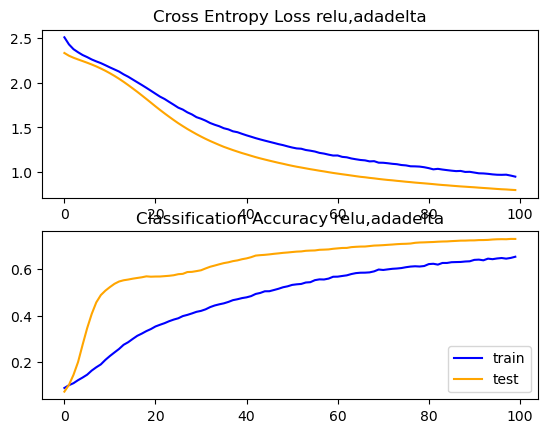

> 92.325


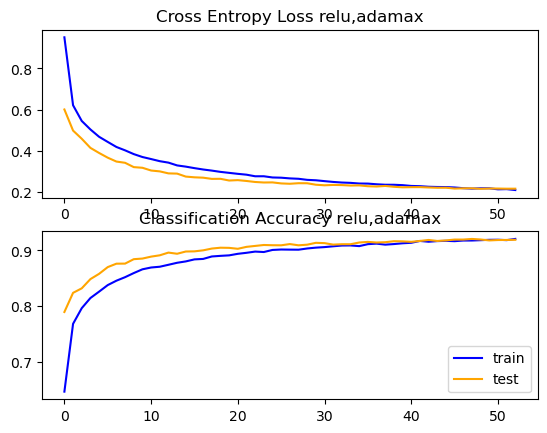

> 92.400


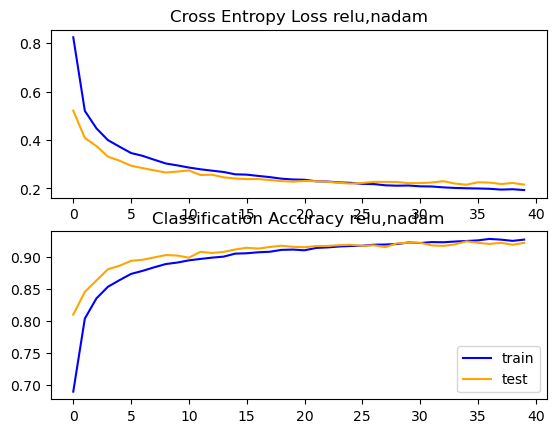

> 91.375


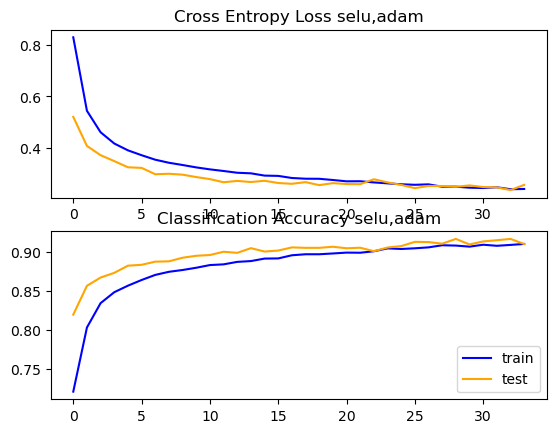

> 88.483


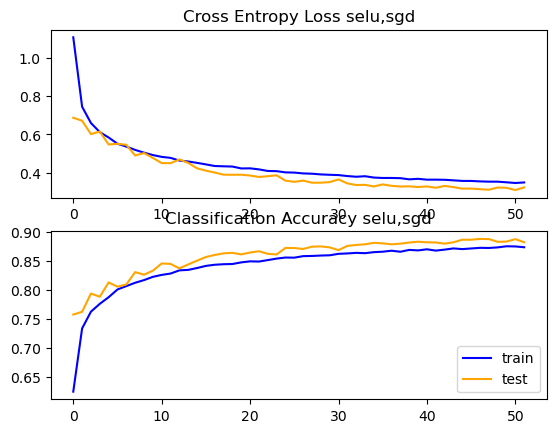

> 91.125


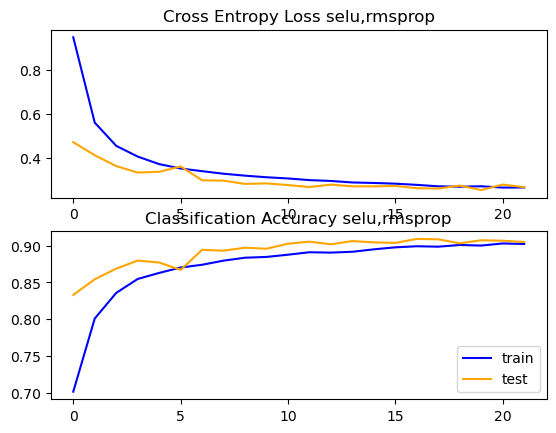

> 78.708


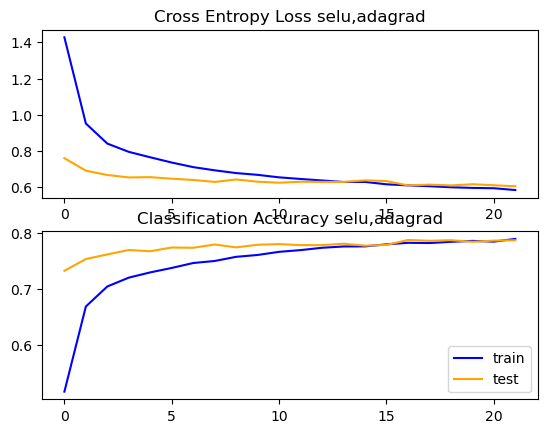

KeyboardInterrupt: 

In [76]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh']
scores_act_opt = list()
act_opt = list(product(activation,optimizers))

for act,opt in product(activation,optimizers):
    acc = run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    scores_act_opt.append(acc)
    



### best optimizer and activation pair

In [ ]:
# create a dataframe of scores_act_opt and act_opt
df_act_opt = pd.DataFrame({'act_opt':act_opt,'scores_act_opt':scores_act_opt})
# highlight highest score_act_opt in df_act_opt
df_act_opt.style.highlight_max(subset=['scores_act_opt'],color='green', axis=0)

# style only score_act_opt in df_act_opt




# Introducing regularization
![](./images/good_over.png)
> Graph 1. Model with a good fit and high variance. Source: https://www.researchgate.net/publication/332412613
<p>We would like a good fit instead as sometimes there are noisy data that will prevent us from generalizing well, preventing the model from predicting well on real world data</p>


## l1 regularization 

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1(l1=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

h_callback = model.fit(X_train, y_train, epochs = 10,
                validation_data=(X_val, y_val))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# L2 regularization

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L2(l2=0.05)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

h_callback = model.fit(X_train, y_train, epochs = 10,
                validation_data=(X_val, y_val))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# L1L2 regularization

In [ ]:
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                kernel_initializer='he_normal',
                input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.01, l2=0.01)))
#loop through the optimizers
model.compile(optimizer='adam',
loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])  
model.summary()

h_callback = model.fit(X_train, y_train, epochs = 10,
                validation_data=(X_val, y_val))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# Conv 2d by machine learning mastery
![](./images/convolutionalNN.png)

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# fit model

h_callback = model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

# How well does it perform on validation?

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)
classifation_matrix = confusion_matrix(y_test_label, pred)
# plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(classifation_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



# Final Model
>  I will be attempting to defeat Machine Learning Mastery model after learning the various features of CNNs

## Auto encoding
> I was curious about this as saw in data camp but just wanted to see if it helped in my final model performance

In [ ]:
# build an auto encoder model
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


# processing 
- data augmentation

# things not done
- batch norms
- building a final model( keras tuner), scikit learn grid search random search (using reduce on plateau)
- auto encoding


# Take notes
- everytime finish should try out on test score
- use a constant seed value ( initialization can be normalized refere to prac 3)
- have i used to_categorical and why should i?
- Batch size training with and without
- kernel_initializer in adding dense layer. It is to have normal distribution when randomly choosing the weights
- idea behind filtering , training the filters which then multiplies.
- max pooling and average pooling ( shrinking down the layers)
- Why is Flattening to 1D useful and comparison.
- dropout should be 0.2/0.5 to 0.8 in keras layer try dropout only


- random search cv




- functional api merge cnn 
- LeNet
- AlexNet
- VGGNet
- GoogLeNet
- ResNet
- ZFNet






# 